# Multiclass prediction

In this notebook I'm gonna show the process to create a prediction of a music_genre usinf Random Forest.

## Imports

In [1]:
%matplotlib inline

In [2]:
#pip install scikit-plot

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder # LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. 
from sklearn.preprocessing import StandardScaler # Make all values in all variables within the same range.
from sklearn.model_selection import train_test_split, cross_val_score #Split arrays or matrices into random train and test subsets.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report,precision_score,classification_report, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
import scikitplot as skplt

## Load data

In [5]:
music = pd.read_csv("/Users/andrescarvajal/Desktop/Data Science/music_genre.csv")

In [6]:
music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


## Exploring and cleaning the data

In [7]:
music.shape
#The data set has 50005 entries described with 18 features.

(50005, 18)

In [8]:
music.duplicated() # Just using duplicated it is not easy to see if there is any duplicated entry.

0        False
1        False
2        False
3        False
4        False
         ...  
50000    False
50001    False
50002    False
50003    False
50004    False
Length: 50005, dtype: bool

### Remove duplicates

In [9]:
music.duplicated().any() # duplicated() returns a bool if the entry is duplicated, any() method returns true if find any true over the iterable object.

True

In [10]:
duplicated = music.duplicated() #Storing duplicated entries, will be a Series Object 
print(duplicated)

0        False
1        False
2        False
3        False
4        False
         ...  
50000    False
50001    False
50002    False
50003    False
50004    False
Length: 50005, dtype: bool


In [11]:
music[duplicated]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
music.iloc[9999:10006] #There are 5 continues entries all of them with not only repeated but with NaN into all the fields.

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
9999,41509.0,Hachioji P,Yeah! Yeah!! Yeah!!!,14.0,0.02000,0.573,226374.0,0.921,0.000004,F#,0.325,-3.841,Major,0.0734,135.029,4-Apr,0.599,Anime
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,77089.0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.621,0.029700,G,0.159,-7.429,Major,0.0382,142.065,4-Apr,0.607,Jazz


In [13]:
music.drop([10000, 10001, 10002, 10003, 10004], inplace = True)

In [14]:
music[duplicated] # When you pass indexing a Data Frame with a Boolean Series it match the True results.

/var/folders/pd/gd_w9jbx5hb006vr17f17dmw0000gn/T/ipykernel_36358/294012141.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  music[duplicated] # When you pass indexing a Data Frame with a Boolean Series it match the True results.


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre


In [15]:
music.shape # Now the Data Frame has 

(50000, 18)

In [16]:
music.reset_index(inplace = True) #The dataset index was reset since 5 rows were removed earlier.

### Handling high entropy

Entropy is a measure of chaos in a system. Because it is much more dynamic than other more rigid metrics like accuracy or even mean squared error. It appears everywhere in machine learning!

Similar values in a feature suggest low entropy, and diverse - high entropy. The higher entropy, the less predictive properties this feature has.

In [17]:
len(music["instance_id"].unique()) #instance_id holds information about a song's ID. These are unique for each sample, thus will not used for modelling. 

50000

In [18]:
len(music["artist_name"].unique()) # artist_name holds information about the singers' name. The dataset contains information about 6863 artists.


6863

In [19]:
music["key"].unique() # key holds information about the tone used in each sounds.

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

In [20]:
music["mode"].unique() # There are two classes in western music, Major and Minor.

array(['Minor', 'Major'], dtype=object)

In [21]:
music["obtained_date"].unique() #It is not clear what information brings, will be remove.

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', '0/4'], dtype=object)

In [22]:
music["music_genre"].unique() # music_genre is the target column, that we are trying to predict.

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

In [23]:
#Non-predictive feature will be remove it.
music = music.drop(["index", "instance_id", "track_name", "obtained_date"], axis = 1) # .drop() removes the index or column, axis = 1 correspond to columns
# New Data Frame
music.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


### Exploring music["artist_name"] 

In [24]:
artists = music["artist_name"].value_counts()[:10].sort_values(ascending = True)
# .value_counts() returns a series object that contains the frecuency of a value, each one will be the index label .sort_values(ascending = True) sort from the lowest to the higest value

In [25]:
artists

Eminem                      147
Yuki Hayashi                167
Capcom Sound Team           169
Drake                       172
Frédéric Chopin             241
Johann Sebastian Bach       314
Ludwig van Beethoven        317
Wolfgang Amadeus Mozart     402
Nobuo Uematsu               429
empty_field                2489
Name: artist_name, dtype: int64

In [26]:
music[music["artist_name"] == "empty_field"]

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
19,empty_field,50.0,0.02810,0.656,307328.0,0.653,0.858000,F#,0.1120,-11.883,Minor,0.0396,117.999,0.1990,Electronic
25,empty_field,34.0,0.02360,0.715,221050.0,0.978,0.000493,D,0.2160,-1.538,Major,0.3620,125.109,0.4180,Electronic
44,empty_field,31.0,0.00350,0.595,222147.0,0.904,0.003780,D,0.0533,-6.805,Minor,0.0349,127.61,0.8410,Electronic
128,empty_field,32.0,0.01390,0.498,-1.0,0.945,0.647000,F,0.3380,-0.003,Minor,0.1370,149.888,0.1790,Electronic
135,empty_field,44.0,0.15300,0.792,265133.0,0.549,0.379000,F,0.3430,-9.855,Major,0.0456,120.01299999999999,0.4760,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49937,empty_field,50.0,0.05480,0.754,132414.0,0.840,0.000014,A,0.1500,-5.111,Major,0.3130,144.991,0.0397,Hip-Hop
49951,empty_field,52.0,0.13300,0.867,-1.0,0.618,0.000002,B,0.1280,-4.956,Minor,0.0614,140.005,0.8570,Hip-Hop
49966,empty_field,51.0,0.12400,0.786,187027.0,0.738,0.000000,C,0.1400,-5.621,Major,0.3890,93.758,0.7800,Hip-Hop
49986,empty_field,53.0,0.00392,0.770,211820.0,0.905,0.000003,F,0.1690,-8.235,Minor,0.1440,135.999,0.4640,Hip-Hop


In [27]:
artists.index

Index(['Eminem', 'Yuki Hayashi', 'Capcom Sound Team', 'Drake',
       'Frédéric Chopin', 'Johann Sebastian Bach', 'Ludwig van Beethoven',
       'Wolfgang Amadeus Mozart', 'Nobuo Uematsu', 'empty_field'],
      dtype='object')

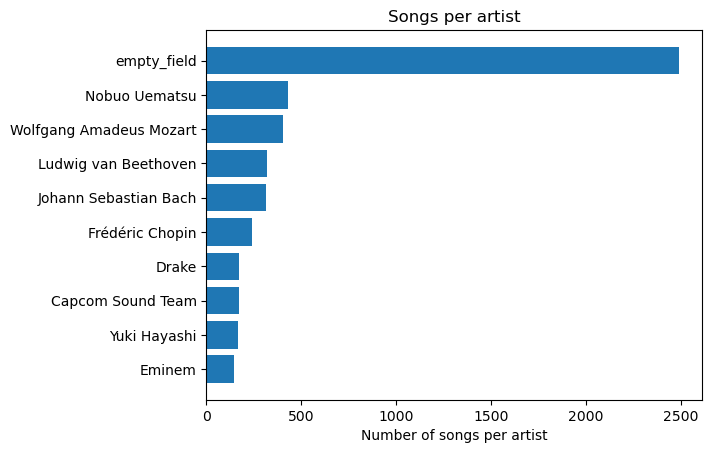

In [28]:
plt.barh(artists.index, artists) #Create a horizontal bar matplotlib graph
plt.xlabel("Number of songs per artist")
plt.title("Songs per artist")
plt.show() #Display matplotlib plot

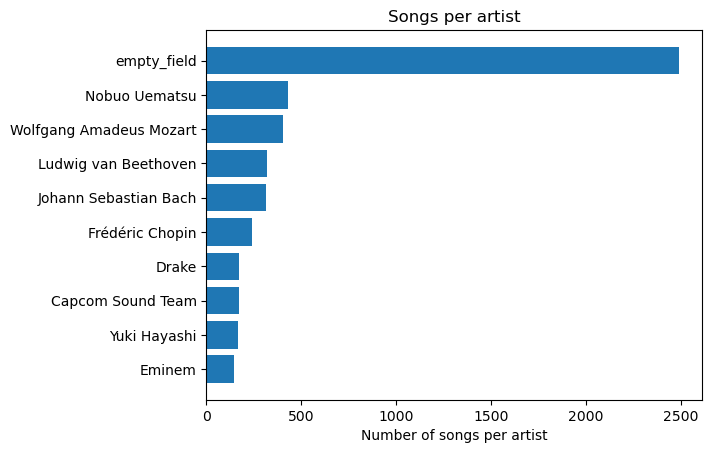

In [29]:
# Now I´m gonna remove all the entries with music["artis_name"] == "empty_field" using the index as a parameter for drop pandas method
#music = music.drop(music[music["artist_name"] == "empty_field"].index)
#Display top 10 artist
top_10_artists = music["artist_name"].value_counts()[:10].sort_values(ascending = True)
plt.barh(top_10_artists.index, top_10_artists)
plt.xlabel("Number of songs per artist")
plt.title("Songs per artist")
plt.show()

In [30]:
# The last step will be remove artist_name to reduce the feature's number and because by itself the name does not provide a valious information.
music.drop("artist_name", axis = 1, inplace = True) # inplace = True returns none and make the operation inplace.

In [31]:
music.head()
#Most of the data are numerical values, just 3 columns are categorical data "key","mode" and "music_genre".

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


## Data Visualization

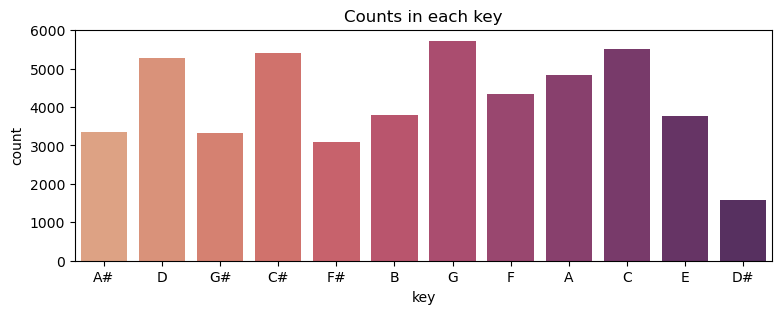

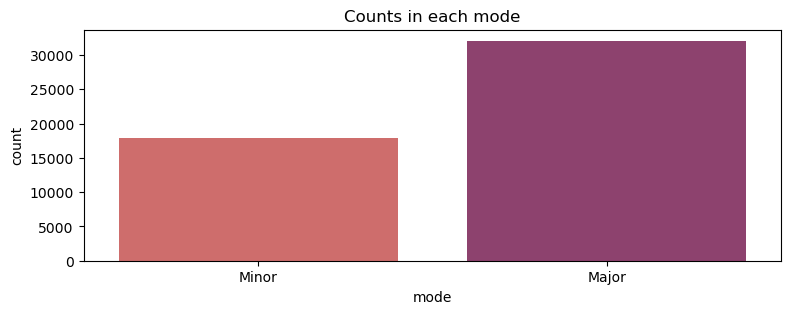

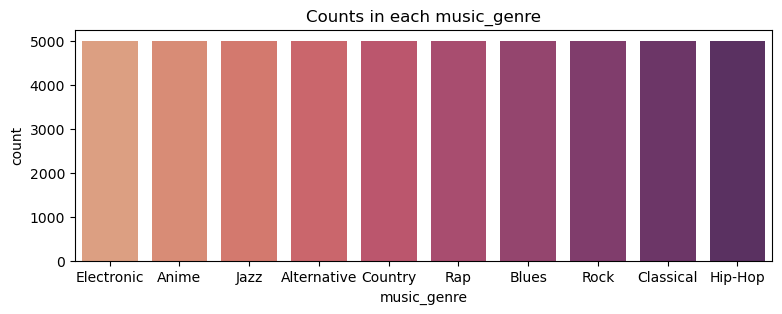

In [32]:
categorical_columns = ["key","mode","music_genre"] # list with categorical columns.

def plot_counts(feature, order = None):
    plt.figure(figsize = (9, 3))# Width and Height in inches
    sns.countplot(x = feature, data = music, palette = "flare", order = order) # Show the coynts of observations in each categorical bin using bars.
    plt.title(f"Counts in each {feature}")
    
for feature in music.columns:
    if feature in categorical_columns:
        plot_counts(feature)
        plt.show()
        

### Histograms

In [33]:
music.dtypes
# The most of columns are float64, to display numerical distributions it has to be a numerical valua, "tempo" has object type so I´m gonna explore it.

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre          object
dtype: object

In [34]:
music['tempo'].head()


0               100.889
1    115.00200000000001
2               127.994
3               128.014
4               145.036
Name: tempo, dtype: object

In [35]:
music["tempo"].unique()

array(['100.889', '115.00200000000001', '127.994', ..., '112.97',
       '167.655', '99.20100000000001'], dtype=object)

In [36]:
# Check wwhat is the string value that is hidden inside de column and is no a float instance
for i in range(len(music)):
    try:
        if isinstance(float(music.iloc[i]['tempo']),float):
            continue
    except:
        print(music.iloc[i]['tempo'])

?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


In [37]:
music[music["tempo"] == "?"]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
5,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,0.6140,Electronic
32,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,0.1380,Electronic
35,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,?,0.2390,Electronic
36,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,0.7270,Electronic
39,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,0.0618,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49913,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,?,0.1440,Hip-Hop
49959,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,?,0.8860,Hip-Hop
49962,62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,?,0.2210,Hip-Hop
49971,52.0,0.70000,0.462,225067.0,0.741,0.000000,A#,0.3400,-8.008,Minor,0.1620,?,0.5890,Hip-Hop


In [38]:
#Remove all entries with "?"
music = music.drop(music[music["tempo"] == "?"].index)
music["tempo"] = music["tempo"].astype("float")

In [39]:
#Check the types
music.dtypes
#Now tempo is float64

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
valence             float64
music_genre          object
dtype: object

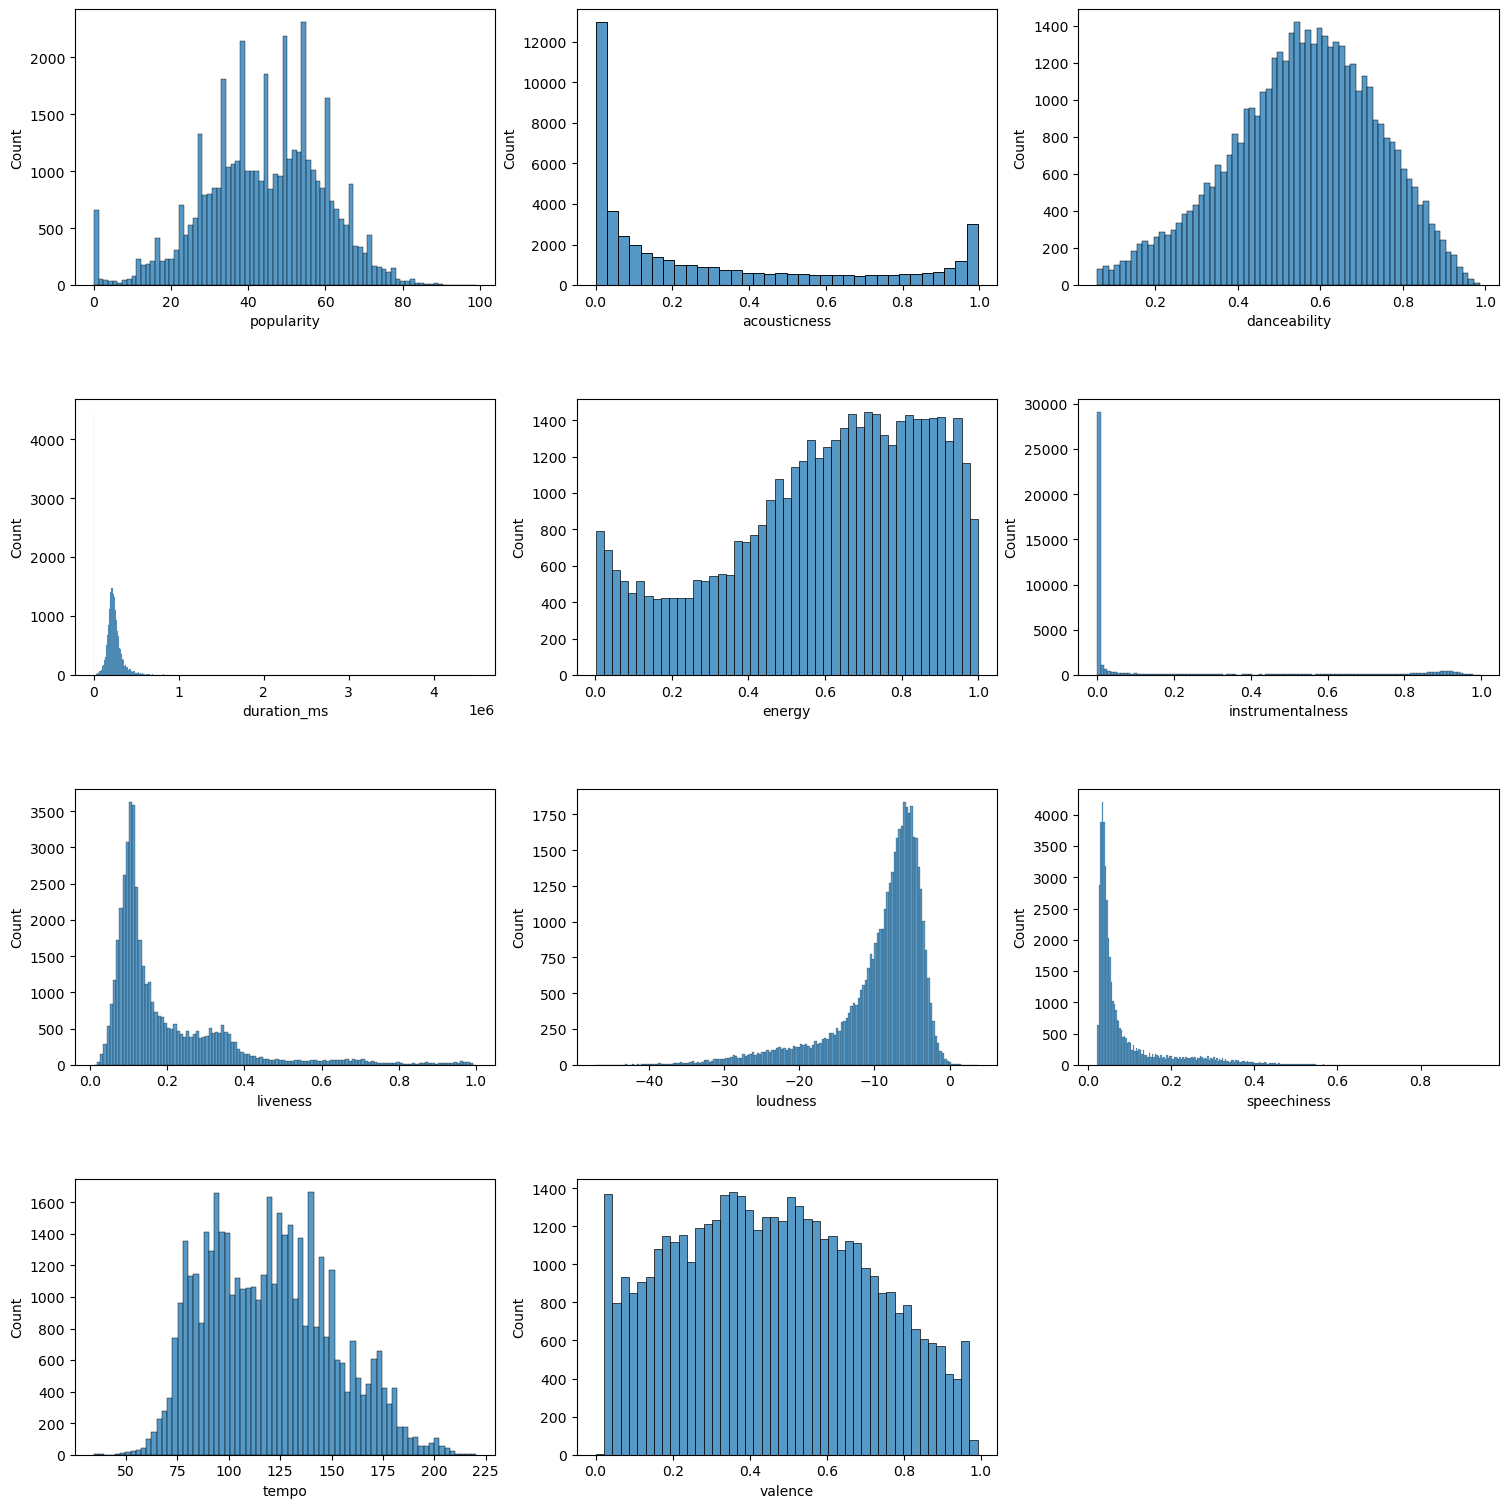

In [40]:
#To display numerical distributions drop the categorical columns
numeric_features = music.drop(["key", "music_genre", "mode"], axis = 1)
#Numerical features
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15)) # Creates a sub plots
fig.delaxes(axs[3][2])# Delete a blank cell on the plot
index = 0

axs = axs.flatten()# To get a copy
for k, v in numeric_features.items():# A Python iterator object that contains two objects for each iteration, the label and the content as a Pandas Series objec
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

### Outliers

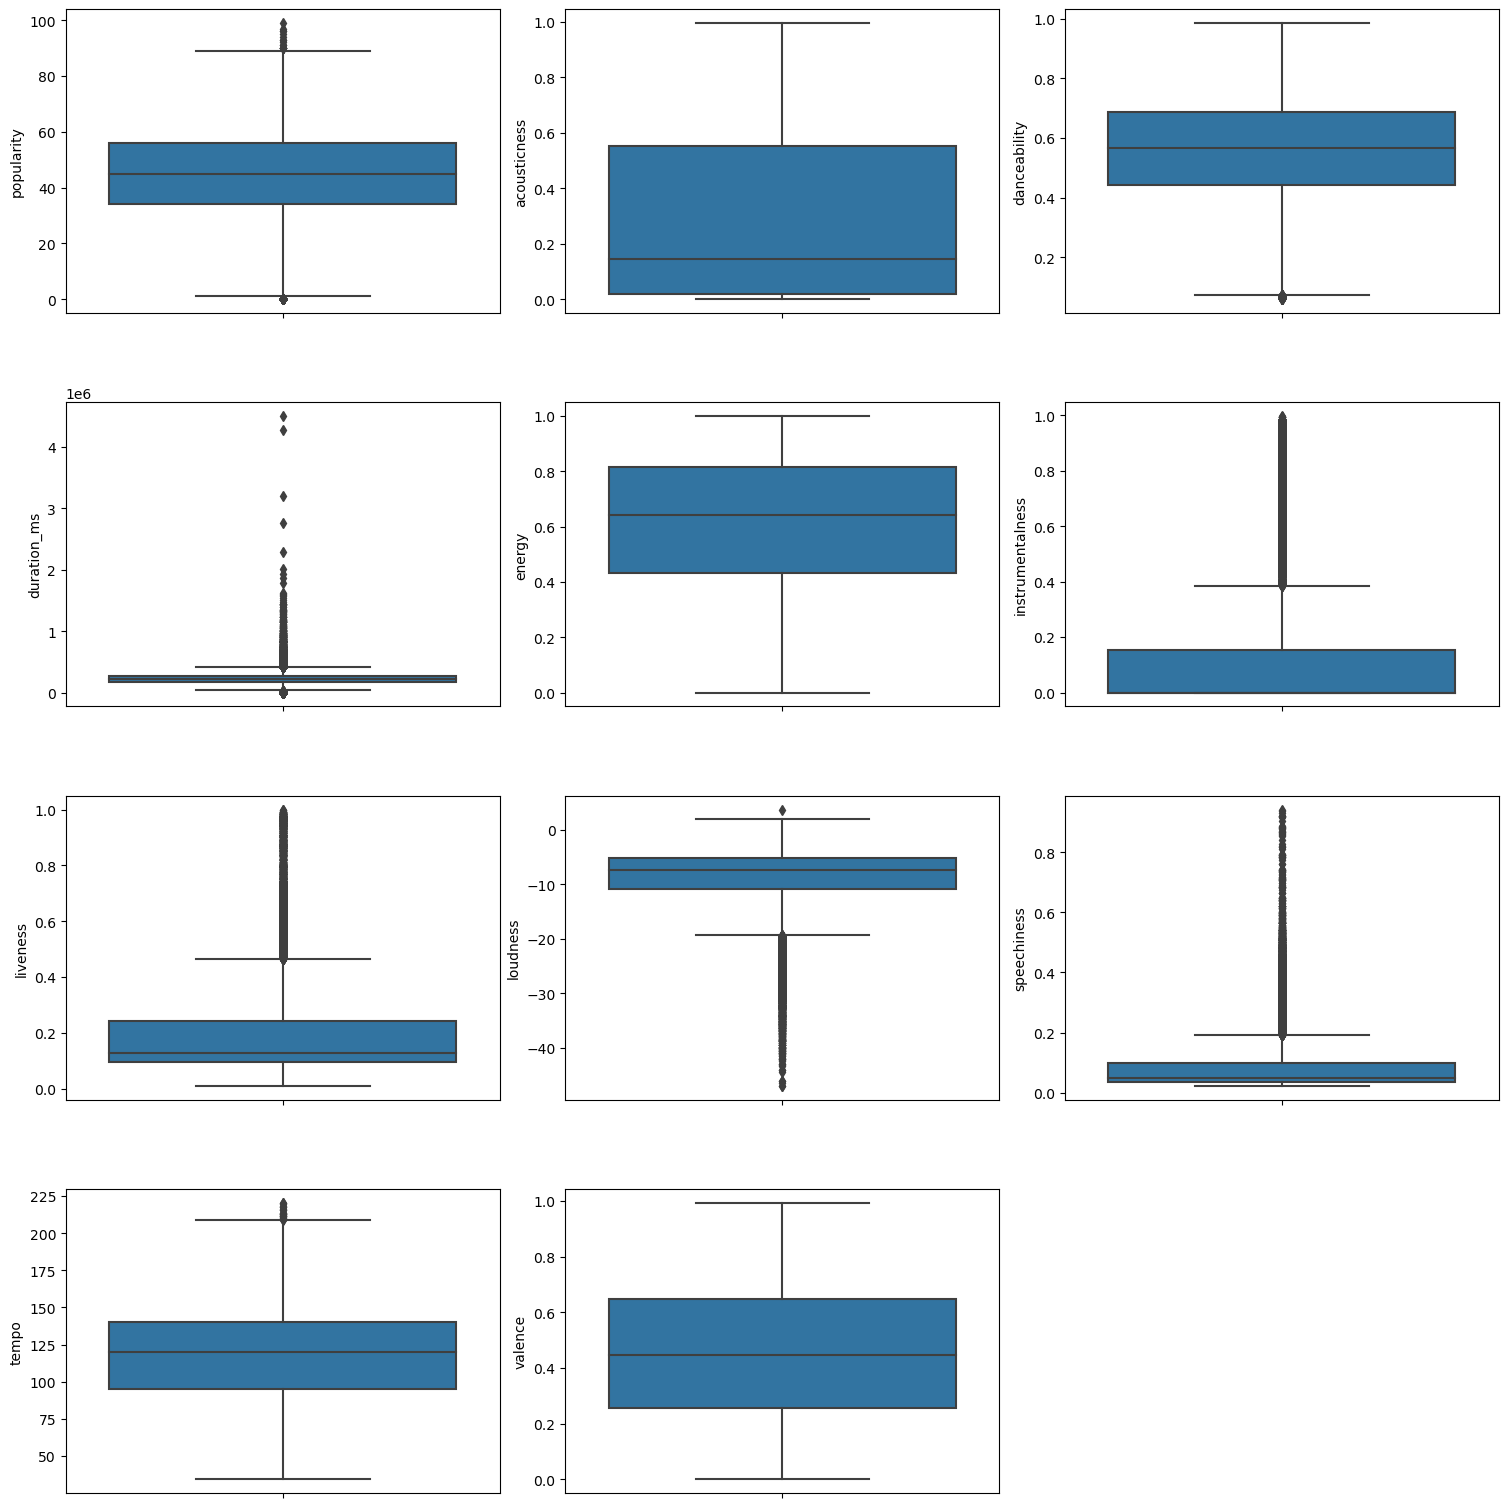

In [41]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
idx = 0
axs = axs.flatten()
for k, v in numeric_features.items():
    sns.boxplot(y = k, data = numeric_features, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

## Encoding categorical data

In [42]:
key_encoder = LabelEncoder() # LabelEncoder() returns Fitted label encoder. An instance itself
mode_encoder = LabelEncoder()
music_genre_encoder = LabelEncoder()


music["key"] = key_encoder.fit_transform(music["key"]) # Fit label encoder and return encoded labels.
music["mode"] = mode_encoder.fit_transform(music["mode"])
music["music_genre"] = music_genre_encoder.fit_transform(music["music_genre"])

In [43]:
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,0.759,5
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.002,0.531,5
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,0.333,5
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,0.270,5
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,0.323,5


In [44]:
music.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
music_genre           int64
dtype: object

## Preprocessing

Preprocessing involves preparing the dataset for modelling. Labels are separated from features; the latter are scaled; both sets are split into training, validation, and testing data.

In [45]:
# Separate labels
music_features = music.drop("music_genre", axis = 1)
music_labels = music["music_genre"]
# Scale features
#scaler = StandardScaler() # Instance of StandarScaler() 
#music_features_scaled = scaler.fit_transform(music_features)
#music_features_scaled.mean(), music_features_scaled.std()
#StandardScaler() handles datasets with outliers. 
#It makes all values centered around 0 with standard deviation of 1.

In [46]:
#The data are split into train, validation, and test set. 
#The algorithm is trained on the former, validated - on the second, and tested - on the latter. 
#A tiny portion is allocated for testing. 
#The same number of samples were set aside for validation. 


tr_val_f, test_features, tr_val_l, test_labels = train_test_split(music_features, music_labels, test_size = 0.1, stratify = music_labels)

train_features, val_features, train_labels, val_labels = train_test_split(tr_val_f, tr_val_l, test_size = len(test_labels), stratify = tr_val_l)

train_features.shape, train_labels.shape, val_features.shape, val_labels.shape, test_features.shape, test_labels.shape

((36016, 13), (36016,), (4502, 13), (4502,), (4502, 13), (4502,))

In [47]:
train_features

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
24794,49.0,0.1810,0.520,213720.0,0.680,0.000003,9,0.1970,-4.649,0,0.0291,75.953,0.536
9620,13.0,0.0561,0.336,91107.0,0.820,0.000215,5,0.3040,-2.770,0,0.0588,87.523,0.479
32151,52.0,0.6370,0.342,240547.0,0.331,0.000000,3,0.1050,-8.884,0,0.0287,130.859,0.106
1265,49.0,0.7910,0.653,314000.0,0.341,0.901000,10,0.1060,-14.029,0,0.0574,171.973,0.275
6357,33.0,0.7630,0.329,290844.0,0.352,0.000001,7,0.2090,-9.611,0,0.0365,131.322,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14884,41.0,0.2400,0.550,289411.0,0.593,0.000566,5,0.0555,-10.846,0,0.0392,175.045,0.506
25098,52.0,0.7250,0.659,-1.0,0.415,0.003230,9,0.1480,-10.060,1,0.0316,74.005,0.486
36044,71.0,0.2490,0.653,-1.0,0.677,0.000000,3,0.4030,-12.244,0,0.0396,114.370,0.888
47612,55.0,0.0783,0.829,155773.0,0.632,0.000000,0,0.0900,-2.921,0,0.2910,70.992,0.491


In [48]:
train_labels

24794    4
9620     1
32151    2
1265     5
6357     1
        ..
14884    7
25098    8
36044    9
47612    6
34595    2
Name: music_genre, Length: 36016, dtype: int64

In [49]:
val_features

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
32280,33.0,0.004790,0.6030,273600.0,0.8560,0.021900,10,0.273,-8.658,0,0.0282,142.584,0.8600
8775,46.0,0.052100,0.7110,312067.0,0.8820,0.000186,4,0.129,-4.014,0,0.0511,94.836,0.6940
2724,55.0,0.001400,0.2970,241173.0,0.6370,0.180000,3,0.247,-7.926,1,0.0336,94.730,0.3320
28830,56.0,0.090600,0.9060,157128.0,0.5580,0.000000,4,0.102,-7.390,1,0.5390,100.943,0.1490
12518,53.0,0.897000,0.6450,237093.0,0.0961,0.000011,2,0.154,-24.896,1,0.0776,130.573,0.4520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17060,65.0,0.030700,0.2690,374333.0,0.5510,0.000619,1,0.118,-8.456,1,0.0274,144.408,0.2020
21224,35.0,0.294000,0.7430,-1.0,0.5330,0.000000,10,0.102,-8.845,0,0.0407,119.936,0.6690
12049,30.0,0.276000,0.6150,-1.0,0.8710,0.002710,10,0.129,-6.321,0,0.2790,151.898,0.5540
41446,0.0,0.938000,0.0769,688173.0,0.0697,0.776000,7,0.128,-22.449,0,0.0426,177.832,0.0362


In [50]:
val_labels

32280    2
8775     1
2724     5
28830    8
12518    7
        ..
17060    0
21224    4
12049    7
41446    3
35968    9
Name: music_genre, Length: 4502, dtype: int64

In [51]:
test_features

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
18976,42.0,0.0145,0.556,236480.0,0.779,0.000000,0,0.1310,-3.537,1,0.0421,120.000,0.384
20431,42.0,0.1300,0.586,199173.0,0.871,0.000000,3,0.1060,-6.867,0,0.0341,77.594,0.921
38052,59.0,0.9120,0.388,155773.0,0.176,0.000336,0,0.0977,-16.952,0,0.0299,97.628,0.342
36342,61.0,0.4920,0.651,198107.0,0.549,0.000000,7,0.1050,-6.566,0,0.0257,106.998,0.307
15812,54.0,0.0013,0.342,207360.0,0.677,0.006710,8,0.2010,-11.906,1,0.0568,188.600,0.501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31868,27.0,0.1660,0.344,323933.0,0.985,0.059300,5,0.9650,-6.307,0,0.0821,191.962,0.286
36442,55.0,0.0385,0.595,220147.0,0.823,0.000001,5,0.0984,-5.864,0,0.0483,108.990,0.745
23876,43.0,0.1180,0.550,260627.0,0.514,0.000000,11,0.0906,-7.348,0,0.0265,138.105,0.311
7056,51.0,0.0209,0.651,281953.0,0.812,0.000000,3,0.2670,-3.382,0,0.0320,99.996,0.924


In [52]:
test_labels

18976    0
20431    4
38052    9
36342    9
15812    0
        ..
31868    2
36442    9
23876    4
7056     1
30523    2
Name: music_genre, Length: 4502, dtype: int64

## Modelling
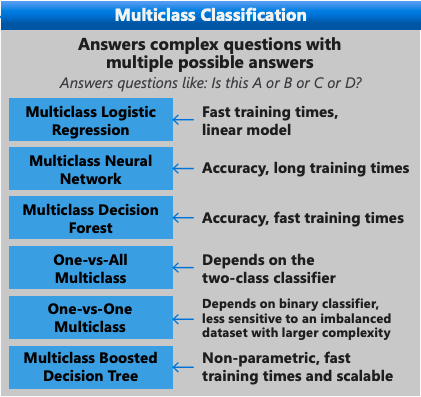

### Random Forest

In [53]:
f1 = make_scorer(f1_score, average = "weighted")

In [54]:
params = {
    #"n_estimators": [10, 15, 20, 25, 30, 35],
    #"max_depth": [5, 10, 15, 20, 25],
    #"min_samples_leaf": [1, 2, 3, 4, 5]
    "n_estimators": [10, 15, 20],
    "max_depth": [5, 10, 15],
    "min_samples_leaf": [1, 2, 3]
}

In [55]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = params, scoring = f1, cv = 5)

In [56]:
grid_search.fit(train_features, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [10, 15, 20]},
             scoring=make_scorer(f1_score, average=weighted))

In [57]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 20}

In [58]:
model = RandomForestClassifier(n_estimators = 35, max_depth = 15, min_samples_leaf = 4)

In [59]:
model.fit(train_features, train_labels)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, n_estimators=35)

## Accuracy and f1 score
### Random Forest

In [60]:
def classification_task(estimator, features, labels):
    """
    Evaluates classification by predicting ("predict") and evaluation ("score") of the modelling alogirthm.
    
    Arguments: 
        Estimator, features (X) and labels (y).
    
    Returns: 
        Model's performance measured in terms of accuracy and f1_score.
    """
    predictions = estimator.predict(features)
    
    print(f"Accuracy: {accuracy_score(labels, predictions)}")
    print(f"F1 score: {f1_score(labels, predictions, average = 'weighted')}")

In [61]:
classification_task(model, train_features, train_labels)

Accuracy: 0.7989782318969347
F1 score: 0.7995590860238528


In [62]:
classification_task(model, val_features, val_labels)

Accuracy: 0.5648600621945802
F1 score: 0.5618426197926152


In [63]:
classification_task(model, test_features, test_labels)

Accuracy: 0.5499777876499333
F1 score: 0.5481937140122989


## Classification report

### Random Forest

In [64]:
print(classification_report(test_labels, model.predict(test_features)))

              precision    recall  f1-score   support

           0       0.48      0.35      0.41       449
           1       0.74      0.71      0.73       450
           2       0.56      0.48      0.52       447
           3       0.84      0.82      0.83       450
           4       0.57      0.57      0.57       449
           5       0.61      0.58      0.60       447
           6       0.38      0.38      0.38       452
           7       0.55      0.52      0.54       452
           8       0.35      0.35      0.35       450
           9       0.48      0.73      0.58       456

    accuracy                           0.55      4502
   macro avg       0.55      0.55      0.55      4502
weighted avg       0.55      0.55      0.55      4502



## Confusion Matrix

### Random Forest

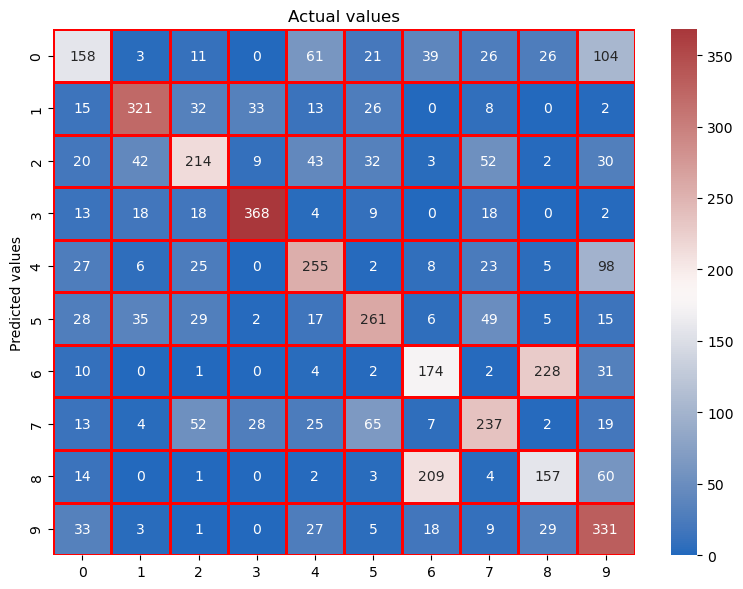

In [65]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(test_labels, model.predict(test_features)),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = model.classes_,
    yticklabels = model.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

##  Feature importance

### Random Forest

<AxesSubplot:title={'center':'Feature Importance'}>

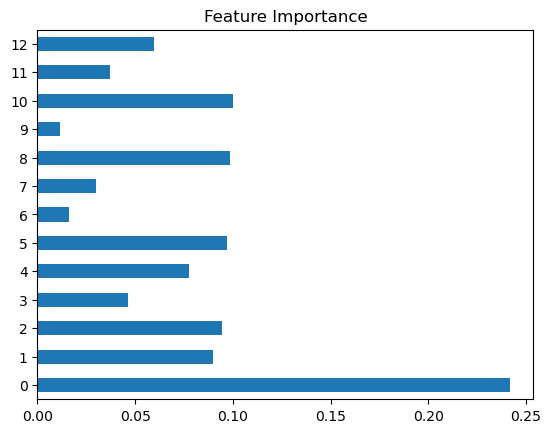

In [66]:
model.feature_importances_
feat_importances = pd.Series(model.feature_importances_)
feat_importances.plot(kind='barh',title = 'Feature Importance')

## ROC curve

### Random Forest

In [67]:
predicted_labels = model.predict_proba(test_features)

In [68]:
roc_auc_score(test_labels, predicted_labels, multi_class = "ovr")

0.9234053166581122

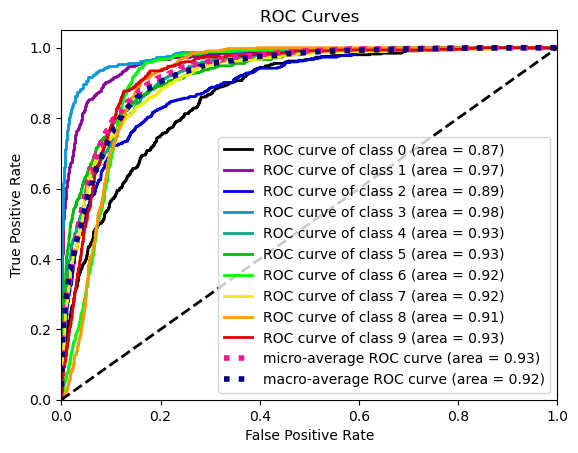

In [69]:
skplt.metrics.plot_roc(test_labels, predicted_labels)
plt.show()

# SHAP

In [70]:
import shap

Permutation explainer: 4503it [40:19,  1.85it/s]                                  


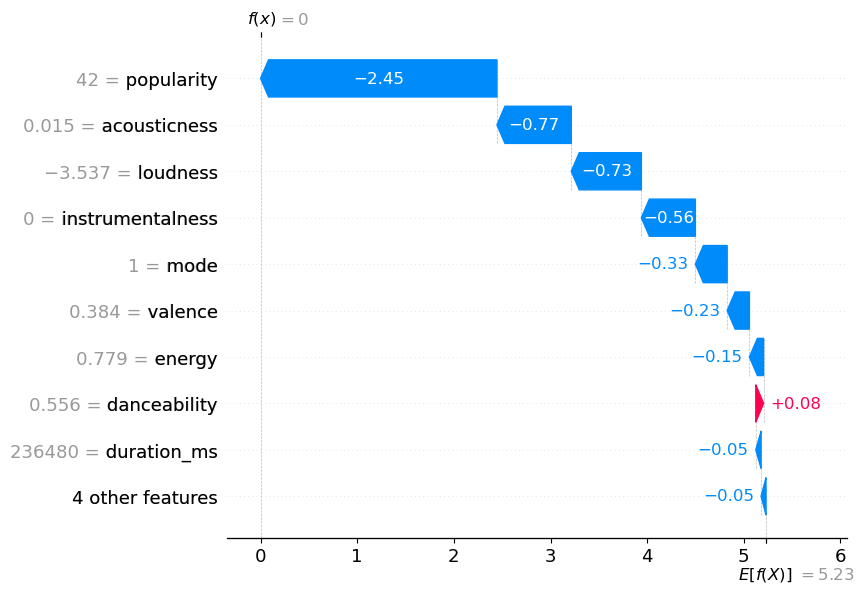

In [71]:
explainer = shap.Explainer(model.predict,test_features)
shap_values = explainer(test_features)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

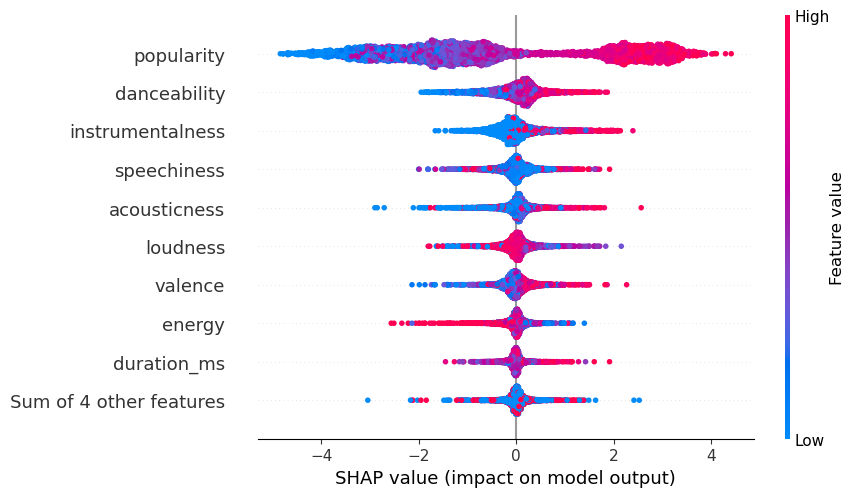

In [72]:
shap.plots.beeswarm(shap_values)